# Exercise 7 | Tube MPC

## Problem 1

Design a tube MPC controller for the following linear system:

$$x^+ = Ax + Bu + w,  A=\begin{bmatrix}1 & 1 \\ 0 & 1\end{bmatrix}, B=\begin{bmatrix}1 \\ 0.5\end{bmatrix} $$

with constraints and bounded disturbance

$$\mathcal{X} = \{x \mid \|x\|_{\infty} \leq 3 \}, \quad \mathcal{U} = \{u \mid ~\|u\|_{\infty} \leq 0.5 \} \quad \mathcal{W} = \{w \mid \|w\|_{\infty} \leq 0.1 \} $$

The matrix $K$ is the LQR gain with $Q=I$ and $R=10$.



In [1]:
import numpy as np
from mpt4py import Polyhedron
from control import dlqr

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

A = np.array([[1, 1], [0, 1]])
B = np.array([[1], [0.5]])
Q = np.eye(2)
R = 10 * np.eye(1)

K, Qf, _ = dlqr(A, B, Q, R)
K = -K
A_cl = A + B @ K

x_max = 3.
u_max = 0.5
w_max = 0.1

X = Polyhedron.from_Hrep(A=np.vstack((np.eye(2), -np.eye(2))), b=x_max*np.ones(4))
U = Polyhedron.from_Hrep(A=np.vstack((np.eye(1), -np.eye(1))), b=u_max*np.ones(2))
W = Polyhedron.from_Hrep(A=np.vstack((np.eye(2), -np.eye(2))), b=w_max*np.ones(4))


### Task 1
Implement a function to compute the minimum robust invariant set $\mathcal{E}$. 

Plot $\mathcal{X}$ and $\mathcal{E}$. How do you expect their Pontryagin difference $\mathcal{X}\ominus\mathcal{E}$ to look like?

**Hints:** 

- When computing your invariant sets, you will iterate through $\mathcal{F}_0, \mathcal{F}_1, \mathcal{F}_2, ...$ as we’ve seen in the lecture and the complexity of these sets will grow rapidly. Therefore, it’s a good idea to call `F.minHrep()` or `F.minVrep()` regularly to reduce the size of these sets. 

- Using the algorithm from the lectures leads to an infinite number of iterations and therefore you have to terminate it after a fixed number. Terminate when the size of the set you’re
adding is sufficiently small. A good termination condition will be $\|(A+BK)^i \|_2 < 10^{-2}$.

- The affine map of a polyhedron $P$ under a matrix $T$ is defined as $Q:=\{y \mid y=Tx, x\in P\}$. In *mpt4py*, this can be computed by `P.affine_map(T)` or `T @ P`.

Not yet convgerged at iteration 2
Not yet convgerged at iteration 3
Not yet convgerged at iteration 4
Not yet convgerged at iteration 5
Not yet convgerged at iteration 6
Not yet convgerged at iteration 7
Not yet convgerged at iteration 8
Not yet convgerged at iteration 9
Not yet convgerged at iteration 10
Not yet convgerged at iteration 11
Not yet convgerged at iteration 12
Not yet convgerged at iteration 13
Not yet convgerged at iteration 14
Not yet convgerged at iteration 15
Not yet convgerged at iteration 16
Minimum robust positive invariant set found after 17 iterations !



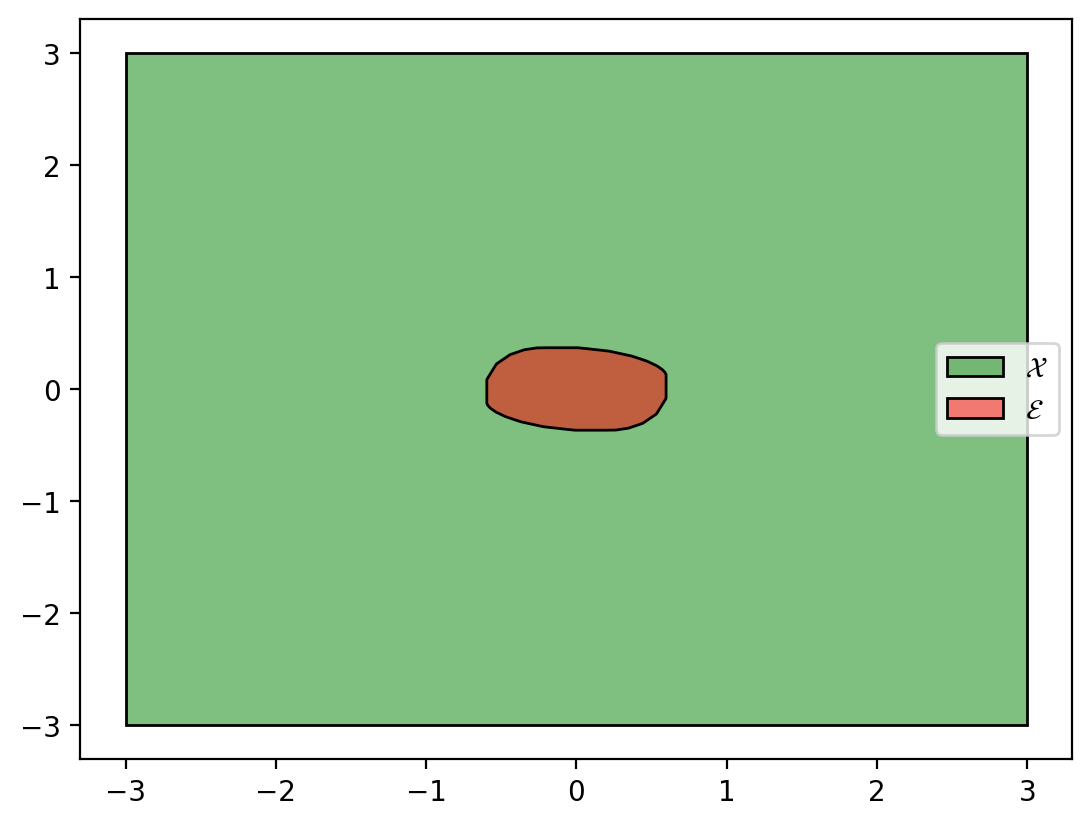

In [24]:
# Compute minimal robust invariant set
def min_robust_invariant_set(A_cl: np.ndarray, W: Polyhedron, max_iter: int = 30) -> Polyhedron:
	# TODO: ------------------
	# TODO: add your code here
	Omega = W # starting at iteration 1 because 0 + W = W
	i = 1
	while i < max_iter :
		A_cl_i = np.linalg.matrix_power(A_cl, i)
		new_Omega = Omega + A_cl_i @ W
		new_Omega.minHrep()
		if np.linalg.matrix_norm(A_cl_i, ord=2) < 1e-2 :
			Omega = new_Omega
			print("Minimum robust positive invariant set found after {0} iterations !\n" .format(i+1))
			break
			
		print("Not yet convgerged at iteration {0}" .format(i+1))
		Omega = new_Omega
		i += 1
	return Omega
	# TODO: ------------------
	

E = min_robust_invariant_set(A_cl, W)

# Visualization
fig1, ax1 = plt.subplots(1, 1)
X.plot(ax1, color='g', opacity=0.5, label=r'$\mathcal{X}$')
E.plot(ax1, color='r', opacity=0.5, label=r'$\mathcal{E}$')
plt.legend()
plt.show()

### Task 2

Compute the tightened state constraints $\tilde{\mathcal{X}} \coloneqq \mathcal{X}\ominus \mathcal{E}$, tightened input constraints $\tilde{\mathcal{U}} \coloneqq \mathcal{U}\ominus K\mathcal{E}$. Plot $\mathcal{\tilde{X}}$ together with $\mathcal{X}$ and $\mathcal{E}$. Does $\mathcal{\tilde{X}}$ match the intuition you developed in Task 1?

Compute the terminal set $\mathcal{X}_f$ for nominal MPC and $\tilde{\mathcal{X}}_f$ for tube MPC. Plot them on a new figure.

**Hints**: 

- You can reuse your code from exercise 3 to compute the terminal set for nominal MPC $\mathcal{X}_f$.

- In mpt4py, the Pontryagin difference of two polyhedra $A\ominus B$ can be easily computed from `A - B` or `A.pontryagin_difference(B)`, where `A` and `B` are two objects of `Polyhedron` class.

- You can compute $K\mathcal{E} := \{ Ke \mid e \in \mathcal{E} \}$ with `E.affine_map(K)` or `K @ E`.

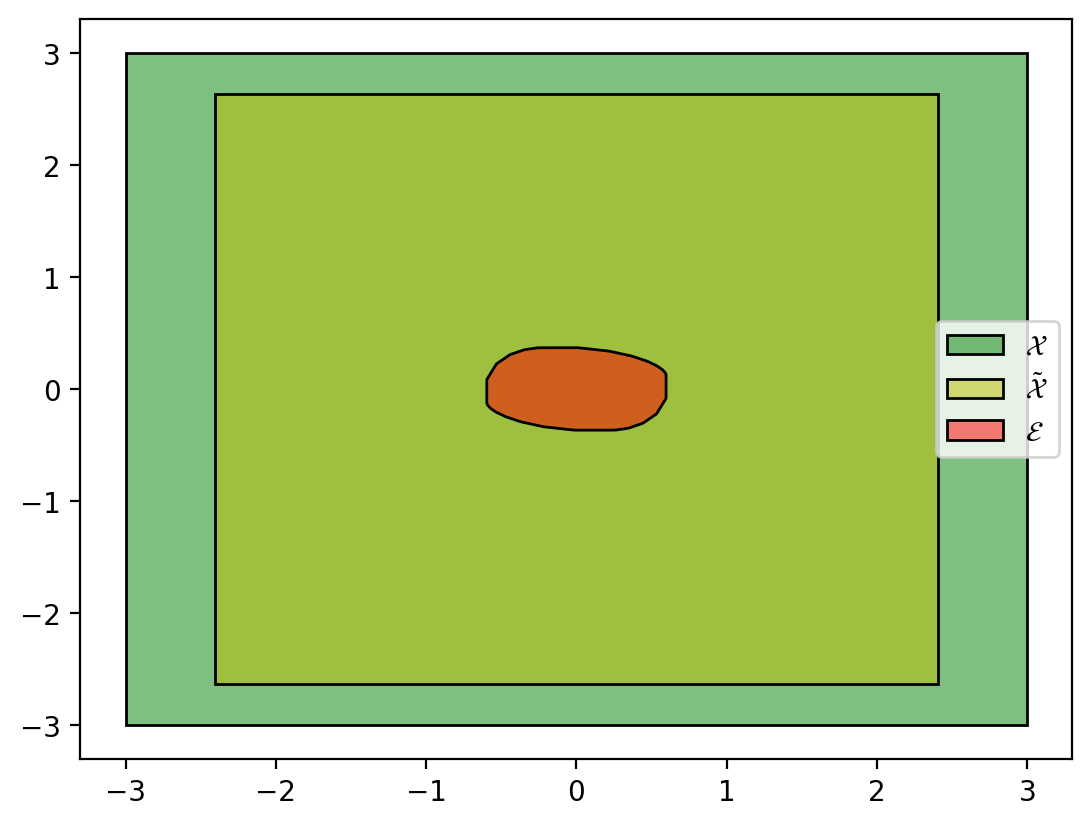

In [25]:

# TODO: ------------------
# TODO: add your code here

# tightened state constraints
X_tilde = X - E

# tightened input constraints
U_tilde = U - K @ E

# TODO: ------------------

# visualization
fig2, ax2 = plt.subplots(1, 1)
X.plot(ax2, color='g', opacity=0.5, label=r'$\mathcal{X}$')
X_tilde.plot(ax2, color='y', opacity=0.5, label=r'$\mathcal{\tilde{X}}$')
E.plot(ax2, color='r', opacity=0.5, label=r'$\mathcal{E}$')
plt.legend()
plt.show()


Not yet convgerged at iteration 1
Not yet convgerged at iteration 2
Maximum positive invariant set found after 3 iterations !

Not yet convgerged at iteration 1
Not yet convgerged at iteration 2
Not yet convgerged at iteration 3
Maximum positive invariant set found after 4 iterations !



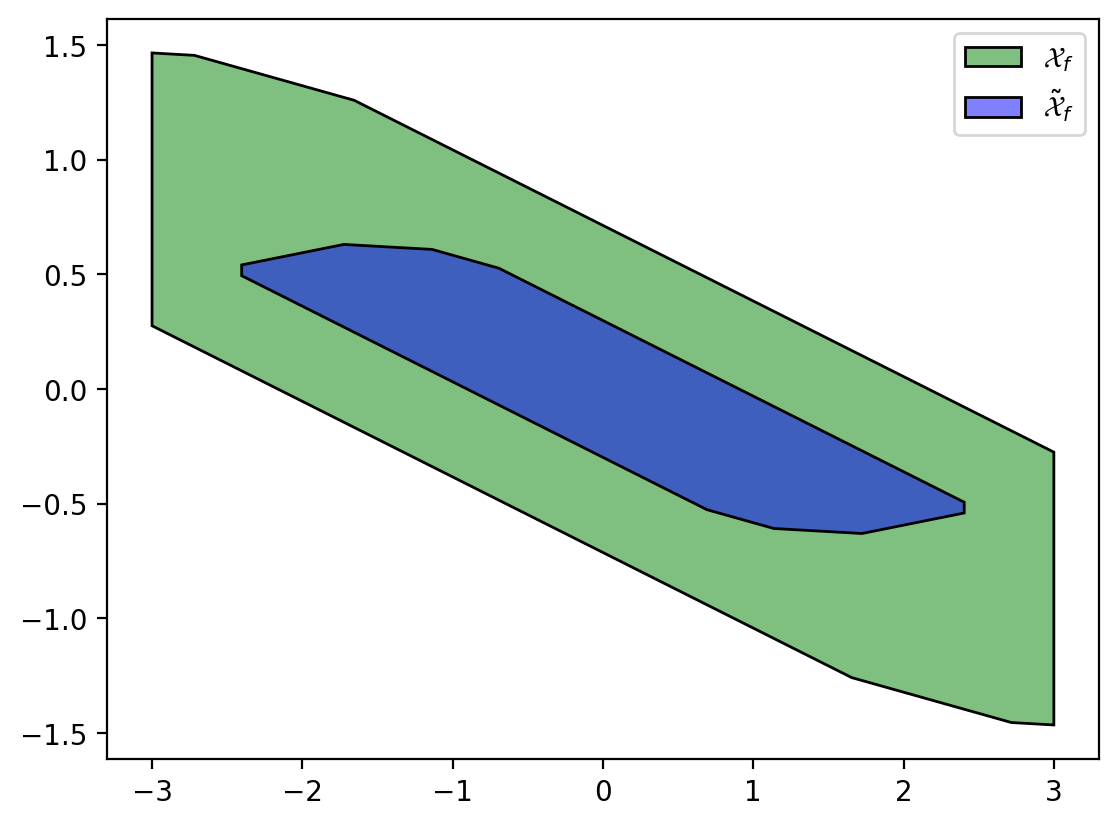

In [27]:

# TODO: ------------------
# TODO: add your code here
def max_invariant_set(A_cl, X: Polyhedron, max_iter = 30) -> Polyhedron:
	"""
	Compute invariant set for an autonomous linear time invariant system x^+ = A_cl x
	"""
	i = 0
	while i < max_iter :
		H, h = X.A, X.b
		pre_X = Polyhedron.from_Hrep(H @ A_cl, h)
		mat_intersect = np.concatenate((pre_X.A, H), axis = 0)	# or use .intersect
		bound_intersect = np.concatenate((h, h), axis = 0)
		X_new = Polyhedron.from_Hrep(mat_intersect, bound_intersect)
		if X == X_new :
			X = X_new
			print("Maximum positive invariant set found after {0} iterations !\n" .format(i+1))
			break
		print("Not yet convgerged at iteration {0}" .format(i+1))
		X = X_new
		i += 1
	return X

# Compute the terminal set for nominal mpc
X_prime = X.intersect(Polyhedron.from_Hrep(U.A@K, U.b))
Xf = max_invariant_set(A_cl, X_prime)

# Compute the terminal set for tube mpc
X_tilde_prime = X_tilde.intersect(Polyhedron.from_Hrep(U_tilde.A@K, U_tilde.b))
Xf_tilde = max_invariant_set(A_cl, X_tilde_prime)

# TODO: ------------------


# visualization
fig3, ax3 = plt.subplots(1, 1)
Xf.plot(ax3, color='g', opacity=0.5, label=r'$\mathcal{X}_f$')
Xf_tilde.plot(ax3, color='b', opacity=0.5, label=r'$\tilde{\mathcal{X}}_f$')
plt.legend()
plt.show()


### Task 3

Formulate the Tube MPC problem using CVXPY.

Use $N=10$ as the prediction horizon.


In [30]:
import cvxpy as cp

N = 10
# Define variables
nx, nu = B.shape
z_var = cp.Variable((N+1, nx), name='z')
v_var = cp.Variable((N, nu), name='v')
x0_var = cp.Parameter((nx,), name='x0')

## Costs
cost = 0
# TODO: ------------------
# TODO: add your code here
for k in range(N):
    cost += cp.quad_form(z_var[k, :], Q)
    cost += cp.quad_form(v_var[k, :], R)
cost += cp.quad_form(z_var[-1, :], Qf)
# TODO: ------------------


## Constraints
constraints = []

constraints.append(z_var[1:, :] == z_var[:-1, :] @ A.T + v_var[:, :] @ B.T)
constraints.append(z_var[:-1, :] @ (X_tilde.A).T <= X_tilde.b)
constraints.append(v_var @ (U_tilde.A).T <= U_tilde.b)
constraints.append(z_var[-1, :] @ (Xf_tilde.A).T <= Xf_tilde.b)
constraints.append(E.A @ (x0_var - z_var[0, :]) <= E.b) 


tube_mpc = cp.Problem(cp.Minimize(cost), constraints)

### Task 4

Run closed-loop simulation with the tube MPC controller you designed, and generate several state–input trajectories starting from the same initial condition $x_0$. 

Plot the trajectories and verify that both the state and input constraints are robustly satisfied under the presence of disturbances $w\in\mathcal{W}$.

**Hints:** 

- If $x_0$ is randomly sampled from $\mathcal{\tilde{X}}$, the underlying optimization problem might be infeasible due to the relatively short horizon. To ensure feasibility, an option is to sample initial condition $x_0$ from the terminal set $\mathcal{\tilde{X}}_f$. 

- In *mpt4py*, you can uniformly sample $m$ points from a polyhedron $P\subset \mathbb{R}^n$ with `x_sampled = P.sample(m)`, where `x_sampled` is a NumPy array with shape `(m, n)`.

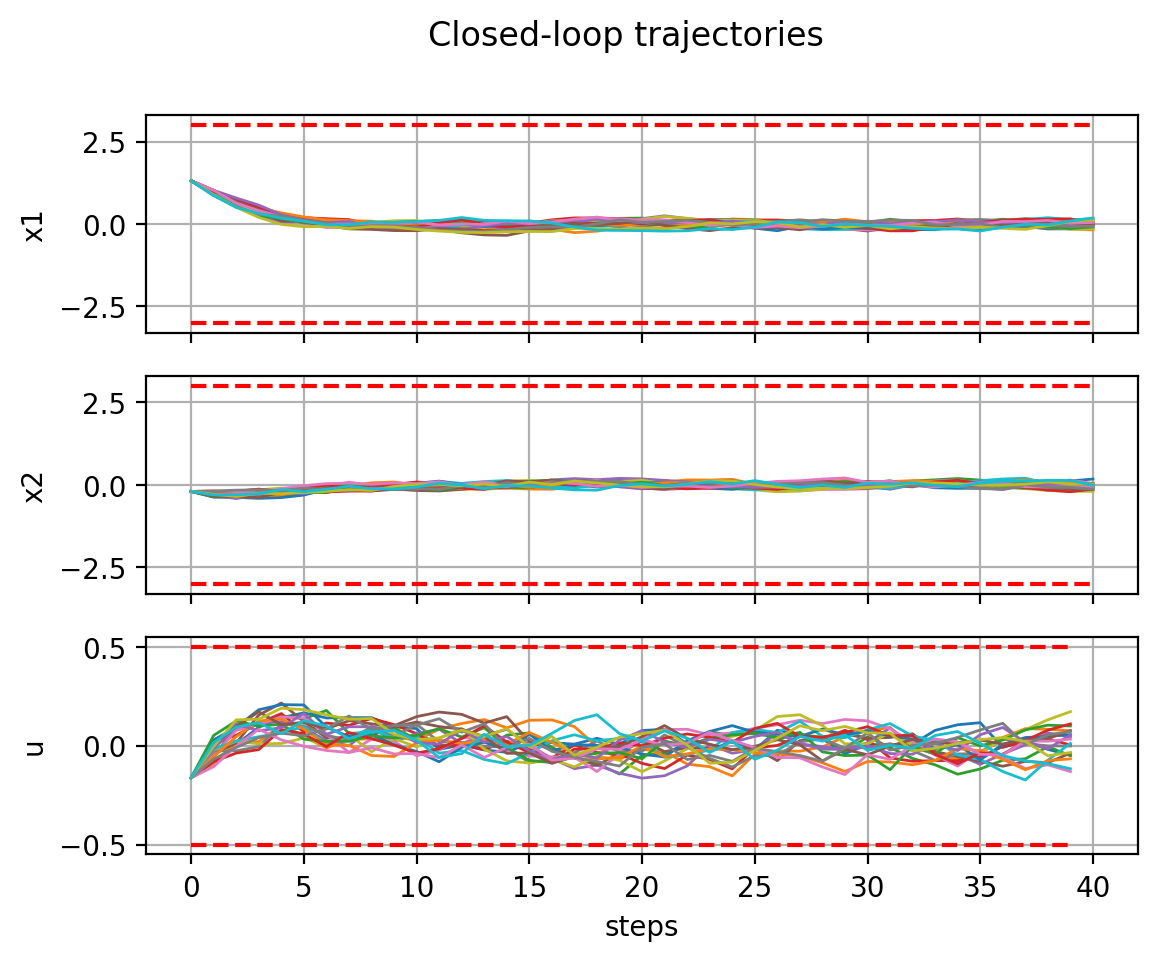

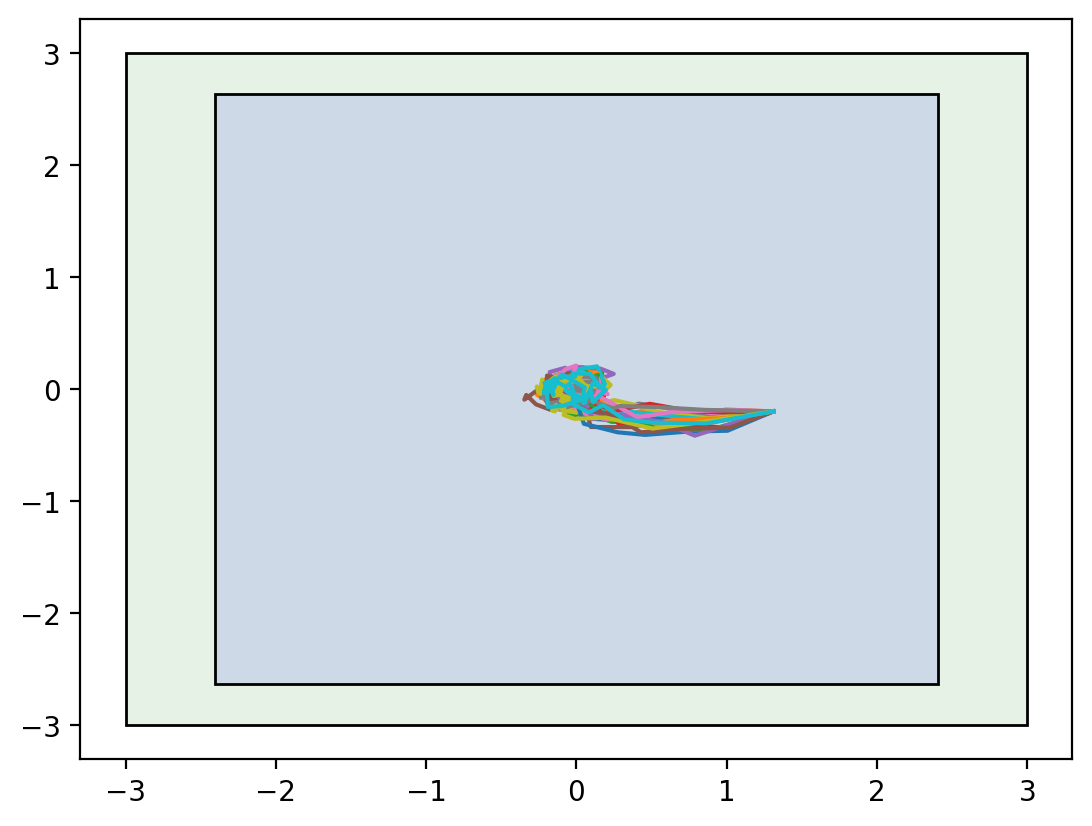

In [ ]:

# Closed-loop simulation of the state and input trajectories
num_samples = 20
N_closed_loop = 40
t_traj_closed_loop = np.arange(0, N_closed_loop+1)
x_trajs_closed_loop = np.zeros((num_samples, N_closed_loop+1, nx)) # 1st dimension for storing trajectories with specific initial condition
u_trajs_closed_loop = np.zeros((num_samples, N_closed_loop, nu))

x0 = Xf_tilde.sample(1).flatten()

# for each sample trajectory # new initial condition sampled for each iteration
for i in range(num_samples):
	x_trajs_closed_loop[i, 0] = x0
	xk = x0

	# run closed loop simulation
	for k in range(N_closed_loop):
		x0_var.value = xk
		tube_mpc.solve(cp.PIQP)
		assert tube_mpc.status == cp.OPTIMAL, f"The tube mpc solver returned status: {tube_mpc.status}"
		
		# TODO: ------------------
		# TODO: add your code here
		# after calling solve(), you can obtain the value of a cvxpy variable x with: x.value()
		zk = z_var.value[0, :]
		vk = v_var.value[0, :]
		uk = K @ (xk - zk) + vk
		# TODO: ------------------
		
		wk = W.sample(1).flatten()
		xk = A @ xk + B @ uk + wk
		x_trajs_closed_loop[i, k+1] = xk.flatten()
		u_trajs_closed_loop[i, k] = uk.flatten()


def plot_trajs(t_traj_closed_loop: np.ndarray, 
               x_trajs_closed_loop: np.ndarray,
               u_trajs_closed_loop: np.ndarray):
	# Visualization of the trajectories
	fig, ax = plt.subplots(3, 1, sharex=True)
	t_traj = t_traj_closed_loop
	linewidth=1.

	for x_traj, u_traj in zip(x_trajs_closed_loop, u_trajs_closed_loop):
		ax[0].plot(t_traj, x_traj[:, 0], label=r'$p$', linewidth=linewidth)
		ax[1].plot(t_traj, x_traj[:, 1], label=r'$v$', linewidth=linewidth)
		ax[2].plot(t_traj[:-1], u_traj[:, 0], label=r'$a$', linewidth=linewidth)
		
	ax[0].plot(t_traj, x_max * np.ones_like(t_traj), color='red', linestyle='--')
	ax[0].plot(t_traj, -x_max * np.ones_like(t_traj), color='red', linestyle='--')
	ax[0].grid()
	ax[0].set_ylabel('x1')

	ax[1].plot(t_traj, x_max * np.ones_like(t_traj), color='red', linestyle='--')
	ax[1].plot(t_traj, -x_max * np.ones_like(t_traj), color='red', linestyle='--')
	ax[1].grid()
	ax[1].set_ylabel('x2')

	ax[2].plot(t_traj[:-1], u_max * np.ones_like(t_traj[:-1]), color='red', linestyle='--')
	ax[2].plot(t_traj[:-1], -u_max * np.ones_like(t_traj[:-1]), color='red', linestyle='--')
	ax[2].grid()
	ax[2].set_ylabel('u')
	ax[2].set_xlabel('steps')

	fig.suptitle('Closed-loop trajectories')
	fig.align_ylabels()
	plt.show()
      
plot_trajs(t_traj_closed_loop, x_trajs_closed_loop, u_trajs_closed_loop)    

fig4, ax4 = plt.subplots(1, 1)
X.plot(ax4, opacity=0.1, color='g', label=r'$\mathcal{X}$')
X_tilde.plot(ax4, opacity=0.1, color='b', label=r'\tilde{\mathcal{X}}')

for x_traj in x_trajs_closed_loop:
	ax4.plot(x_traj[:,0], x_traj[:,1])

plt.show()